In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [2]:
jobs = pd.read_csv("1000_job_description_dataset.csv")
jobs.head()


,id,job_role,skills_required,experience_years,level,job_description
0,1,Python Developer,"Python, Git, Flask Basics",0,Fresher,"Basic knowledge of Python programming, scripti..."
1,2,Software Tester,"Selenium, Automation Testing, JIRA",4,Experienced,"Experience in automation testing, frameworks, ..."
2,3,Software Tester,"Selenium, Automation Testing, JIRA",2,Experienced,"Experience in automation testing, frameworks, ..."
3,4,Data Scientist,"Python, Statistics, Pandas, NumPy, Machine Lea...",0,Fresher,"Strong foundation in Python, statistics, and m..."
4,5,Data Analyst,"Excel, SQL, Statistics Basics",0,Fresher,"Ability to work with Excel and SQL to clean, a..."


In [3]:
def extract_skills(skill_column):
    skills = []
    for row in skill_column.dropna():
        for skill in row.split(","):
            skill = skill.strip().lower()
            if skill:
                skills.append(skill)
    return skills

all_skills = extract_skills(jobs["skills_required"])
len(all_skills)


3633

In [4]:
skill_counts = Counter(all_skills)

skill_df = (
    pd.DataFrame(skill_counts.items(), columns=["Skill", "Frequency"])
    .sort_values(by="Frequency", ascending=False)
    .reset_index(drop=True)
)

skill_df.head(10)


,Skill,Frequency
0,python,280
1,sql,196
2,aws,187
3,machine learning,138
4,rest apis,136
5,git,113
6,java,112
7,postgresql,81
8,django,81
9,networking,76


In [5]:
def classify_skill_trends(df):
    total = len(df)

    df["Trend"] = "Low Demand"
    df.loc[df.index < total * 0.2, "Trend"] = "High Demand"
    df.loc[
        (df.index >= total * 0.2) & (df.index < total * 0.5),
        "Trend"
    ] = "Emerging"

    return df

trend_df = classify_skill_trends(skill_df)
trend_df.head(15)


,Skill,Frequency,Trend
0,python,280,High Demand
1,sql,196,High Demand
2,aws,187,High Demand
3,machine learning,138,High Demand
4,rest apis,136,High Demand
5,git,113,High Demand
6,java,112,High Demand
7,postgresql,81,High Demand
8,django,81,High Demand
9,networking,76,High Demand


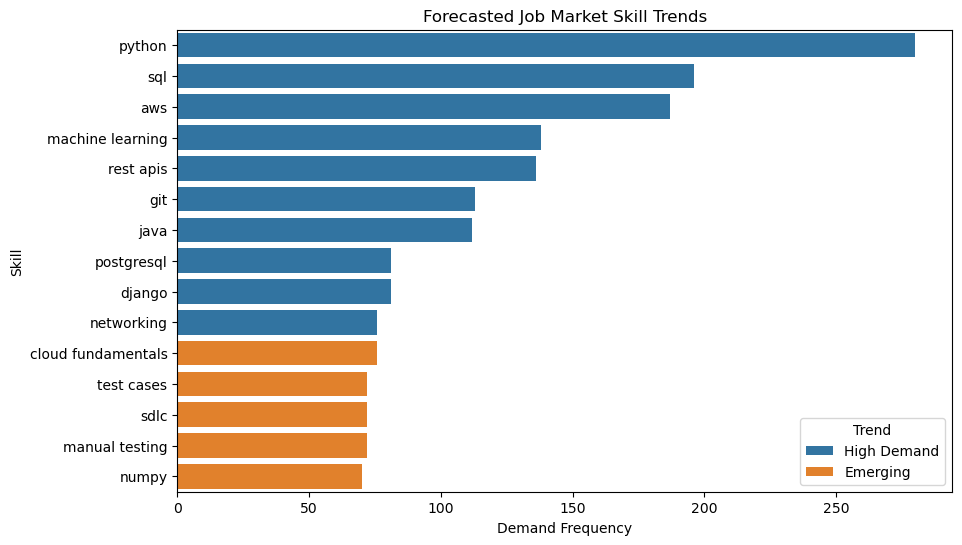

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=trend_df.head(15),
    x="Frequency",
    y="Skill",
    hue="Trend",
    dodge=False
)
plt.title("Forecasted Job Market Skill Trends")
plt.xlabel("Demand Frequency")
plt.ylabel("Skill")
plt.show()


In [7]:
student_skills = "python, sql, html, css, java"
student_set = set(s.strip().lower() for s in student_skills.split(","))

future_skills = set(
    trend_df[trend_df["Trend"].isin(["High Demand", "Emerging"])]["Skill"]
)

missing_future_skills = future_skills - student_set
missing_future_skills


{'aws',
 'cloud fundamentals',
 'data visualization',
 'deep learning',
 'django',
 'excel',
 'git',
 'machine learning',
 'manual testing',
 'networking',
 'numpy',
 'pandas',
 'postgresql',
 'power bi',
 'rest apis',
 'sdlc',
 'statistics',
 'statistics basics',
 'tensorflow',
 'terraform',
 'test cases'}

In [8]:
print("📈 Skills to Learn for Future Job Market:\n")

for skill in sorted(missing_future_skills):
    print("-", skill.title())


📈 Skills to Learn for Future Job Market:

- Aws
- Cloud Fundamentals
- Data Visualization
- Deep Learning
- Django
- Excel
- Git
- Machine Learning
- Manual Testing
- Networking
- Numpy
- Pandas
- Postgresql
- Power Bi
- Rest Apis
- Sdlc
- Statistics
- Statistics Basics
- Tensorflow
- Terraform
- Test Cases


In [9]:
# ===== EXPORT FORECAST RESULTS =====

# trend_df already exists in your notebook
# Columns: Skill, Frequency, Trend

trend_df.to_csv("career_forecast_trends.csv", index=False)

print("career_forecast_trends.csv saved successfully")


career_forecast_trends.csv saved successfully
